In [1]:
import os
import nltk
import string
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer

In [29]:
#Needed first time only
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\103467\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
ngram_range_inp=(1,2)
filename = "D:/Pepsico/input_data_1.xlsx"

# Text Normalization

In [3]:
import re
import nltk
import numpy as np
import string
exclude = set(string.punctuation) 
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['from']
stop_words.extend(newStopWords)
table = str.maketrans('', '', string.punctuation)
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def normalize_document(doc):
    # tokenize document
    tokens = doc.split()
    # remove punctuation from each word
    tokens = [w.translate(table) for w in tokens]
    # convert to lower case
    lower_tokens = [w.lower() for w in tokens]
    #remove spaces
    stripped = [w.strip() for w in lower_tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter stopwords out of document
    filtered_tokens = [token for token in words if token not in stop_words]
    #apply Stemming
    #stemmed = [porter.stem(word) for word in filtered_tokens]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [3]:
import pandas as pd
fsha_data = pd.read_excel(filename)

In [4]:
#List the columns names
list(fsha_data.columns)

['projName',
 'accolNumber',
 'PDA_projName',
 'projType',
 ' projDesc',
 'formulaNumber',
 'owner',
 ' sector',
 'Unnamed: 8',
 'Unnamed: 9',
 ' center',
 ' cur_tsgStage',
 'WHTD',
 ' manufacSite',
 ' plantTrail',
 'packMaterial',
 'prodName',
 ' CPD-prodNameDesc',
 ' procPlat',
 ' intrinsicProd',
 'preservatives',
 ' pH',
 'waterActivity',
 'packaging',
 ' otherFSA',
 'allergens',
 'prod_storageDist',
 ' shelfLife',
 ' TCG',
 'foodSafety_prodClaims',
 'cookedOrHeated',
 'specificStorage',
 ' labelingInstructions ',
 'mishandled',
 ' targetMarket',
 ' fastTrack',
 'baseProduct',
 'prodModifications',
 ' newIngradient',
 ' approvedPackage',
 'potentialMicrobial',
 ' cross_contactAllergens',
 'chokeHazard',
 'operationalAllergen',
 'Unnamed: 44',
 'Unnamed: 45']

In [5]:
fsha_data.head()

,projName,accolNumber,PDA_projName,projType,projDesc,formulaNumber,owner,sector,Unnamed: 8,Unnamed: 9,...,baseProduct,prodModifications,newIngradient,approvedPackage,potentialMicrobial,cross_contactAllergens,chokeHazard,operationalAllergen,Unnamed: 44,Unnamed: 45
0,PRD - Reformulation Sweetcorn 10905989_IFF_SUA,46172,Cheetos Shots Sweetcorn / Cerezza TV Sweetcorn,Productivity,Reformulation of SweetCorn 10905989 seasoning ...,not provided,Zeynep Yolcu 0090 850 279 40 00,ESSA,NaN,NaN,...,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN
1,PRD - Reformulation - SYM Peanut Flavour_Turkey,31989,Cheetos Peanut,Productivity,Reformulation of Peanut 355722 seasoning to dr...,not provided,Zeynep Yolcu 0090 850 279 40 00,ESSA,NaN,NaN,...,No,No,Yes,No,needs to be decided as to what value,needs to be decided as to what value,needs to be decided as to what value,Yes,NaN,NaN
2,Chipniks Commercialization at Awesome Snacks,NaN,Simba Chipniks,Capacity Expansion,Leveraging on Awesome Snacks extra fryer capac...,NaN,Sherwin Tlhoaele,ESSA,NaN,NaN,...,No,Yes,No,No,No,Yes,No,NaN,NaN,NaN
3,Crisp-mas 2018,50178,Walkers LTO christmas,Refresh,5 Christmas LTO's 3 x NPD 2 x L&S,christmas,Steve Wilson,ESSA,NaN,NaN,...,No,No,No,No,No,Yes,No,Yes,NaN,NaN
4,Simba Shapes Next Gen,36559,"Simba Shapes - Playz, Simba Shapes Twistz",Breakthrough - South Africa & Nigeria,Purchase an existing Pellet spec used by Pepsi...,unknown,Dina Atoyan (+7(495)9370550 (*63402) ),ESSA,NaN,NaN,...,Yes,Yes,Yes,No,No,Yes,Yes,Yes,NaN,NaN


# Model preparation (taking few features)

In [6]:
dataframe_model = fsha_data[["potentialMicrobial"," projDesc"," center"," cur_tsgStage","WHTD"," CPD-prodNameDesc"," procPlat"]]

In [7]:
dataframe_model
train_df = dataframe_model

In [8]:
train_df

,potentialMicrobial,projDesc,center,cur_tsgStage,WHTD,CPD-prodNameDesc,procPlat
0,Yes,Reformulation of SweetCorn 10905989 seasoning ...,Istanbul,Development,Scale Up,Extruded Snack with sweetcorn seasoning,Extruded
1,needs to be decided as to what value,Reformulation of Peanut 355722 seasoning to dr...,Istanbul,Development,Scale Up,Extruded Snack with peanut seasoning,Extruded
2,No,Leveraging on Awesome Snacks extra fryer capac...,Boksburg,Scale Up,Scale Up,"Potato containing mixed grain fried pellet, wi...",Fried Pellet
3,No,5 Christmas LTO's 3 x NPD 2 x L&S,Beaumont park,2,Scale Up,Potato Crisps,slice and fry
4,No,Purchase an existing Pellet spec used by Pepsi...,Beaumont Park / Johannesburg,Stage 3,Scale Up,Pellet Snacks (Twist and 3D Hexagon) containin...,"Pellet Extrusion, Fried, Seasoned, Packed"
5,Yes,"Commission a new pellet line in Prospecton, So...",Beaumont Park / Johannesburg,Stage 3,Scale Up,Pellet Snacks (Twist and 3D Hexagon) containin...,"Pellet Extrusion, Fried, Seasoned, Packed"
6,No,Validate a new oil blend for Lays and Simba to...,SSA,Gate 3,Plant Trial,Harmonized specification for both Lays flat cu...,Fried
7,No,Star Puffs Cheese & STar Hyper Cheese\nSeasoni...,Warsaw,G3,Scale Up,"Extruded and baked corn base product, flavoure...",extruded
8,No,Inclusions are added to the dough via side fee...,Istanbul,Development Stage 3,Scale Up,Baked Lay's with herbs and vegetables inclusions,"Baked, RBS flex line"
9,No,Topping of the current potato cracker design p...,Beaumont Park,G1 approved,Plant Trial,"Baked potato cracker glazed with milk protein,...","Sheeted, Baked"


In [9]:
#Processing the categorical variables
lists_=[" center"," cur_tsgStage","WHTD"," CPD-prodNameDesc"," procPlat"]

for k in range(len(lists_)):
    if k == 0:
        independent_undersample = pd.get_dummies(train_df[lists_[k]].astype('category'))
        independent_undersample.index = train_df.index
        independent_undersample.columns = [lists_[k]+"_bucket_"+str(each) for each in range(independent_undersample.shape[1])]
    else:
        cat = pd.get_dummies(train_df[lists_[k]].astype('category'))
        cat.index = train_df.index
        cat.columns = [lists_[k]+"_bucket_"+str(each) for each in cat.columns]
        independent_undersample = pd.concat([independent_undersample,cat],axis=1)

In [10]:
independent_undersample

,center_bucket_0,center_bucket_1,center_bucket_2,center_bucket_3,center_bucket_4,center_bucket_5,center_bucket_6,cur_tsgStage_bucket_2,cur_tsgStage_bucket_Development,cur_tsgStage_bucket_Development Stage 3,...,CPD-prodNameDesc_bucket_Potato Crisps,"CPD-prodNameDesc_bucket_Potato containing mixed grain fried pellet, with in-dough Chicken Flavour and topical salt","procPlat_bucket_Baked, RBS flex line",procPlat_bucket_Extruded,procPlat_bucket_Fried,procPlat_bucket_Fried Pellet,"procPlat_bucket_Pellet Extrusion, Fried, Seasoned, Packed","procPlat_bucket_Sheeted, Baked",procPlat_bucket_extruded,procPlat_bucket_slice and fry
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
to_be_concatenated = train_df[["potentialMicrobial"," projDesc"]]
train_df = pd.concat([to_be_concatenated,independent_undersample],axis=1)

In [12]:
train_df

,potentialMicrobial,projDesc,center_bucket_0,center_bucket_1,center_bucket_2,center_bucket_3,center_bucket_4,center_bucket_5,center_bucket_6,cur_tsgStage_bucket_2,...,CPD-prodNameDesc_bucket_Potato Crisps,"CPD-prodNameDesc_bucket_Potato containing mixed grain fried pellet, with in-dough Chicken Flavour and topical salt","procPlat_bucket_Baked, RBS flex line",procPlat_bucket_Extruded,procPlat_bucket_Fried,procPlat_bucket_Fried Pellet,"procPlat_bucket_Pellet Extrusion, Fried, Seasoned, Packed","procPlat_bucket_Sheeted, Baked",procPlat_bucket_extruded,procPlat_bucket_slice and fry
0,Yes,Reformulation of SweetCorn 10905989 seasoning ...,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,needs to be decided as to what value,Reformulation of Peanut 355722 seasoning to dr...,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,No,Leveraging on Awesome Snacks extra fryer capac...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,No,5 Christmas LTO's 3 x NPD 2 x L&S,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,No,Purchase an existing Pellet spec used by Pepsi...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,Yes,"Commission a new pellet line in Prospecton, So...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,No,Validate a new oil blend for Lays and Simba to...,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,No,Star Puffs Cheese & STar Hyper Cheese\nSeasoni...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,No,Inclusions are added to the dough via side fee...,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,No,Topping of the current potato cracker design p...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
# splitting the training dataset
from sklearn.model_selection import train_test_split 
xdf_train, xdf_test = train_test_split(train_df, test_size=0.3,random_state=1) 

In [14]:
train_labels_train = xdf_train["potentialMicrobial"]
train_labels_test = xdf_test["potentialMicrobial"]

In [15]:
train_labels_train

4                                       No
0                                      Yes
3                                       No
1    needs to be decided as to what value 
7                                       No
8                                       No
5                                      Yes
Name: potentialMicrobial, dtype: object

In [16]:
type(train_labels_train)

pandas.core.series.Series

# Normalizing the features 

In [17]:
clean_text_train = xdf_train[' projDesc'].astype(str)
clean_text_test = xdf_test[' projDesc'].astype(str)

In [18]:
norm_clean_text_train = normalize_corpus(clean_text_train)
norm_clean_text_test = normalize_corpus(clean_text_test)

In [19]:
norm_clean_text_train[1]

'reformulation sweetcorn seasoning drive seasoning cost per kg reduction deliver productivity product qualification technical match action standart change base product production seasoning changing'

In [20]:
norm_clean_text_test[1]

'topping current potato cracker design produced line wessa use dried herbs spices process change scarf plate added line trial pre post oven apply dried toppings'

# Generating Bag of Words model with TF-IDF Vectors (n_gram range = 1,2)

In [30]:
import numpy as np


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Vectorization parameters

# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = ngram_range_inp

# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Whether text should be split into word or character n-grams.
# One of 'word', 'char'.
TOKEN_MODE = 'word'

# Minimum document/corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 2

# Limit on the length of text sequences. Sequences longer than this
# will be truncated.
MAX_SEQUENCE_LENGTH = 500


def ngram_vectorize(train_texts, train_labels, val_texts):
    """Vectorizes texts as ngram vectors.

    1 text = 1 tf-idf vector the length of vocabulary of uni-grams + bi-grams.

    # Arguments
        train_texts: list, training text strings.
        train_labels: np.ndarray, training labels.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val: vectorized training and validation texts
    """
    # Create keyword arguments to pass to the 'tf-idf' vectorizer.
    kwargs = {
            'ngram_range': NGRAM_RANGE,  # Use 1-grams + 2-grams.
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': TOKEN_MODE,  # Split text into word tokens.
            'min_df': MIN_DOCUMENT_FREQUENCY,
    }
    vectorizer = TfidfVectorizer(**kwargs)

    # Learn vocabulary from training texts and vectorize training texts.
    x_train = vectorizer.fit_transform(train_texts)

    # Vectorize validation texts.
    x_val = vectorizer.transform(val_texts)

    # Select top 'k' of the vectorized features.
    #selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    #selector.fit(x_train, train_labels)
    #x_train = selector.transform(x_train)
    #x_val = selector.transform(x_val)

    x_train = x_train.astype('float32')
    x_val = x_val.astype('float32')
    return x_train, x_val

In [31]:
# Vectorize texts.
x_train, x_test = ngram_vectorize(norm_clean_text_train, train_labels_train, norm_clean_text_test)

C:\Users\103467\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [32]:
x_train.shape

(7, 56)

In [33]:
print(x_train[0])

  (0, 8)	0.462119
  (0, 15)	0.462119
  (0, 16)	0.2310595
  (0, 17)	0.2310595
  (0, 19)	0.2310595
  (0, 20)	0.2310595
  (0, 23)	0.2310595
  (0, 28)	0.2310595
  (0, 29)	0.2310595
  (0, 39)	0.19750202
  (0, 44)	0.2310595
  (0, 45)	0.2310595
  (0, 55)	0.2310595


# Generating Principal Components from TF-IDF Vectors

In [31]:
X_dense_train = x_train.toarray()
X_dense_test = x_test.toarray()

In [32]:
from sklearn.decomposition import PCA
n_components = 2
whiten = False
random_state = 42
svd_solver="full"

In [33]:
pca = PCA(n_components=n_components,svd_solver=svd_solver,whiten=whiten, random_state=42)
X_pca = pca.fit_transform(X_dense_train)

In [34]:
X_pca.shape

(7, 2)

In [35]:
X_pca = pd.DataFrame(X_pca)
X_pca.index=xdf_train.index

In [36]:
train_df_1 = xdf_train.drop(' projDesc',1)
train_model_data = pd.concat([X_pca,train_df_1],axis=1)

In [37]:
train_model_data

,0,1,potentialMicrobial,center_bucket_0,center_bucket_1,center_bucket_2,center_bucket_3,center_bucket_4,center_bucket_5,center_bucket_6,...,CPD-prodNameDesc_bucket_Potato Crisps,"CPD-prodNameDesc_bucket_Potato containing mixed grain fried pellet, with in-dough Chicken Flavour and topical salt","procPlat_bucket_Baked, RBS flex line",procPlat_bucket_Extruded,procPlat_bucket_Fried,procPlat_bucket_Fried Pellet,"procPlat_bucket_Pellet Extrusion, Fried, Seasoned, Packed","procPlat_bucket_Sheeted, Baked",procPlat_bucket_extruded,procPlat_bucket_slice and fry
4,-0.586602,-0.420635,No,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0,0.751467,-0.233237,Yes,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-0.097958,0.656325,No,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.751467,-0.233237,needs to be decided as to what value,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7,-0.069729,0.198885,No,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,-0.183771,0.524720,No,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5,-0.564876,-0.492821,Yes,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
pca_test = PCA(n_components=n_components,svd_solver=svd_solver,whiten=whiten, random_state=42)
X_pca_test = pca_test.fit_transform(X_dense_test)

In [39]:
X_pca_test = pd.DataFrame(X_pca_test)
X_pca_test.index=xdf_test.index
test_df_1 = xdf_test.drop(' projDesc',1)
test_model_data = pd.concat([X_pca_test,test_df_1],axis =1)

In [40]:
test_model_data

,0,1,potentialMicrobial,center_bucket_0,center_bucket_1,center_bucket_2,center_bucket_3,center_bucket_4,center_bucket_5,center_bucket_6,...,CPD-prodNameDesc_bucket_Potato Crisps,"CPD-prodNameDesc_bucket_Potato containing mixed grain fried pellet, with in-dough Chicken Flavour and topical salt","procPlat_bucket_Baked, RBS flex line",procPlat_bucket_Extruded,procPlat_bucket_Fried,procPlat_bucket_Fried Pellet,"procPlat_bucket_Pellet Extrusion, Fried, Seasoned, Packed","procPlat_bucket_Sheeted, Baked",procPlat_bucket_extruded,procPlat_bucket_slice and fry
2,-0.281322,0.657417,No,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
9,-0.536088,-0.533673,No,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.817410,-0.123744,No,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
train_model_data = train_model_data.drop('potentialMicrobial',1)
test_model_data = test_model_data.drop('potentialMicrobial',1)

# Multi-layer Perceptron model with n-gram TF-IDF Vectors

In [46]:
import tensorflow as tf
from tensorflow.python.keras import models
from tensorflow.python.keras import initializers
from tensorflow.python.keras import regularizers

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.layers import SeparableConv1D
from tensorflow.python.keras.layers import MaxPooling1D
from tensorflow.python.keras.layers import GlobalAveragePooling1D


def mlp_model(layers, units, dropout_rate, input_shape, num_classes):
    """Creates an instance of a multi-layer perceptron model.

    # Arguments
        layers: int, number of `Dense` layers in the model.
        units: int, output dimension of the layers.
        dropout_rate: float, percentage of input to drop at Dropout layers.
        input_shape: tuple, shape of input to the model.
        num_classes: int, number of output classes.

    # Returns
        An MLP model instance.
    """
    #op_units, op_activation = _get_last_layer_units_and_activation(num_classes)
    model = models.Sequential()
    model.add(Dropout(rate=dropout_rate, input_shape=input_shape))

    for _ in range(layers-1):
        model.add(Dense(units=units, activation='relu'))
        model.add(Dropout(rate=dropout_rate))

    model.add(Dense(units=1, activation='sigmoid'))
    return model

In [47]:
train_model_data.shape[1:]

(36,)

In [48]:
num_classes = 2
learning_rate=1e-3
epochs=10
batch_size=128
layers=2
units=64
dropout_rate=0.2
# Create model instance.
model = mlp_model(layers=layers,units=units,dropout_rate=dropout_rate,input_shape=train_model_data.shape[1:],num_classes=num_classes)  

In [49]:
loss = 'binary_crossentropy'
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics=['acc'])

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2368      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

In [ ]:
train_labels_train=train_labels_train.apply(lambda x:1 if x=='Yes' else 0)
train_labels_test=train_labels_test.apply(lambda x:1 if x=='Yes' else 0)

In [ ]:
train_labels_test

In [126]:
# Train and validate model.
history = model.fit(
            train_model_data,
            train_labels_train,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=(test_model_data, train_labels_test),
            verbose=2,  # Logs once per epoch.
            batch_size=batch_size)

Train on 7 samples, validate on 3 samples
Epoch 1/10
 - 2s - loss: 0.7689 - acc: 0.5714 - val_loss: 0.6463 - val_acc: 0.6667
Epoch 2/10
 - 0s - loss: 0.7106 - acc: 0.5714 - val_loss: 0.6391 - val_acc: 0.6667
Epoch 3/10
 - 0s - loss: 0.7293 - acc: 0.5714 - val_loss: 0.6321 - val_acc: 0.6667
Epoch 4/10
 - 0s - loss: 0.7138 - acc: 0.4286 - val_loss: 0.6252 - val_acc: 0.6667
Epoch 5/10
 - 0s - loss: 0.6473 - acc: 0.4286 - val_loss: 0.6184 - val_acc: 0.6667
Epoch 6/10
 - 0s - loss: 0.6384 - acc: 0.4286 - val_loss: 0.6117 - val_acc: 0.6667
Epoch 7/10
 - 0s - loss: 0.7043 - acc: 0.5714 - val_loss: 0.6050 - val_acc: 0.6667
Epoch 8/10
 - 0s - loss: 0.5477 - acc: 0.7143 - val_loss: 0.5984 - val_acc: 0.6667
Epoch 9/10
 - 0s - loss: 0.5985 - acc: 0.7143 - val_loss: 0.5919 - val_acc: 0.6667
Epoch 10/10
 - 0s - loss: 0.4998 - acc: 0.8571 - val_loss: 0.5854 - val_acc: 0.6667


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


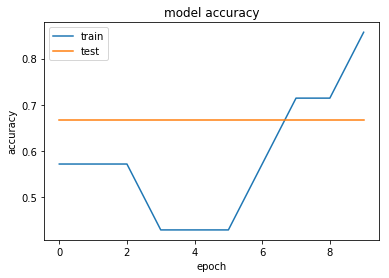

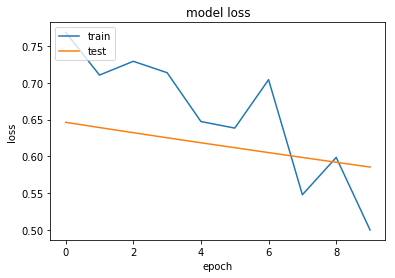

In [128]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [129]:
history = history.history
print('Validation accuracy: {acc}, loss: {loss}'.format(
            acc=history['val_acc'][-1], loss=history['val_loss'][-1]))

Validation accuracy: 0.6666666865348816, loss: 0.5853980183601379


In [131]:
_, acc = model.evaluate(train_model_data, train_labels_train, verbose=0)
print( ' Train Accuracy: %f ' % (acc*100))
_, acc = model.evaluate(test_model_data, train_labels_test, verbose=0)
print( ' Test Accuracy: %f ' % (acc*100))

 Train Accuracy: 71.428573 
 Test Accuracy: 66.666669 


# CountVectorizer 

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
# Create the count vector frequency feature matrix
countVec = CountVectorizer(ngram_range=(3,3))
#normalize_corpus
feature_matrix = countVec.fit_transform(normalize_corpus(train_df[' projDesc']))
# Show tf-idf feature matrix
feature_matrix.toarray()
#print(countVec.get_feature_names())
print(len(countVec.get_feature_names()))

235


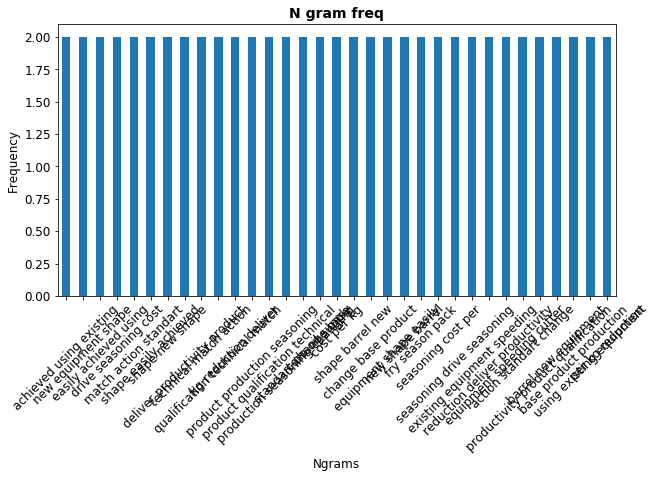

In [48]:
#Display Freq plot of n-grams
%matplotlib inline
num_ngrams=2
all_ngrams = list(countVec.get_feature_names())
#print(all_ngrams)
num_ngrams = min(num_ngrams, len(all_ngrams))
all_counts = feature_matrix.toarray().sum(axis=0).tolist()
#print(all_counts)
data_tuples = list(zip(all_ngrams,all_counts))
df_cv = pd.DataFrame(data_tuples)
df_cv = df_cv.rename(columns={0: 'Ngram'})
df_cv = df_cv.rename(columns={1: 'Ngram Freq'})
df_cv_sorted = df_cv.sort_values(by='Ngram Freq',ascending=False)
#.plot(kind='bar')
#df_cv_sorted['Ngram Freq']
df_cv_sorted = df_cv_sorted[df_cv_sorted['Ngram Freq'] >= 2]
#df_cv_sorted
x = range(len(df_cv_sorted))
x_labels = df_cv_sorted['Ngram']
axarr = df_cv_sorted['Ngram Freq'].sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
axarr.set_title("N gram freq",fontsize=14,fontweight='bold')
axarr.set_xlabel("Ngrams",fontsize=12)
axarr.set_ylabel("Frequency",fontsize=12)
axarr.tick_params(axis='both',which='major',labelsize=12)
axarr.tick_params(axis='both',which='minor',labelsize=12)
axarr.set_xticklabels(x_labels, rotation='45')


In [144]:
train_labels_train

4    0
0    1
3    0
1    1
7    0
8    0
5    1
Name: potentialMicrobial, dtype: int64

# Fit ML Models

In [76]:
#logistic regression
C=1
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X_ = StandardScaler().fit_transform(train_model_data)
clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga').fit(X_,train_labels_train)
coef_l1_LR = clf_l1_LR.coef_.ravel()
sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
print("C=%.2f" % C)
print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
print("{:<40} {:.2f}".format("Score with L1 penalty:",clf_l1_LR.score(X_,train_labels_train )))
y_pred = clf_l1_LR.predict(test_model_data)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(train_labels_test,y_pred))  
print(classification_report(train_labels_test,y_pred))  

C=1.00
Sparsity with L1 penalty:                94.44%
Score with L1 penalty:                   0.86
[[3]]
             precision    recall  f1-score   support

         No       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         3



In [152]:
#maxent classifier
from nltk.classify import maxent
#svm
from sklearn.svm import SVC  
#kernel poly SVC(kernel='poly', degree=8)  
#kernel gauss svclassifier = SVC(kernel='rbf')  
#kernel sigmoid SVC(kernel='sigmoid') 
svclassifier = SVC(kernel='linear')  
svclassifier.fit(train_model_data, train_labels_train)  
y_pred = svclassifier.predict(test_model_data)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(train_labels_test,y_pred))  
print(classification_report(train_labels_test,y_pred))  

[[3]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         3



In [173]:
train_model_data

,center_bucket_0,center_bucket_1,center_bucket_2,center_bucket_3,center_bucket_4,center_bucket_5,center_bucket_6,cur_tsgStage_bucket_2,cur_tsgStage_bucket_Development,cur_tsgStage_bucket_Development Stage 3,...,CPD-prodNameDesc_bucket_Potato Crisps,"CPD-prodNameDesc_bucket_Potato containing mixed grain fried pellet, with in-dough Chicken Flavour and topical salt","procPlat_bucket_Baked, RBS flex line",procPlat_bucket_Extruded,procPlat_bucket_Fried,procPlat_bucket_Fried Pellet,"procPlat_bucket_Pellet Extrusion, Fried, Seasoned, Packed","procPlat_bucket_Sheeted, Baked",procPlat_bucket_extruded,procPlat_bucket_slice and fry
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [174]:
test_model_data

,center_bucket_0,center_bucket_1,center_bucket_2,center_bucket_3,center_bucket_4,center_bucket_5,center_bucket_6,cur_tsgStage_bucket_2,cur_tsgStage_bucket_Development,cur_tsgStage_bucket_Development Stage 3,...,CPD-prodNameDesc_bucket_Potato Crisps,"CPD-prodNameDesc_bucket_Potato containing mixed grain fried pellet, with in-dough Chicken Flavour and topical salt","procPlat_bucket_Baked, RBS flex line",procPlat_bucket_Extruded,procPlat_bucket_Fried,procPlat_bucket_Fried Pellet,"procPlat_bucket_Pellet Extrusion, Fried, Seasoned, Packed","procPlat_bucket_Sheeted, Baked",procPlat_bucket_extruded,procPlat_bucket_slice and fry
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Naive Bayes (need to remove PCA Components due to negative values)

In [175]:
##multinomial naive bayes
train_model_data = train_model_data[train_model_data[2:35]]
test_model_data = test_model_data[test_model_data[2:35]]
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(train_model_data, train_labels_train)  
y_pred = model.predict(test_model_data)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(train_labels_test,y_pred))  
print(classification_report(train_labels_test,y_pred)) 

[[1 2]
 [0 0]]
             precision    recall  f1-score   support

          0       1.00      0.33      0.50         3
          1       0.00      0.00      0.00         0

avg / total       1.00      0.33      0.50         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [154]:
X_train = train_model_data
y_train = train_labels_train
X_test = test_model_data
y_test = train_labels_test

In [158]:
#k neighbour classifier
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)    
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[2 1]
 [0 0]]
             precision    recall  f1-score   support

          0       1.00      0.67      0.80         3
          1       0.00      0.00      0.00         0

avg / total       1.00      0.67      0.80         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [159]:
#dtree
from sklearn import tree
model = tree.DecisionTreeClassifier().fit(X_train, y_train) 
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[1 2]
 [0 0]]
             precision    recall  f1-score   support

          0       1.00      0.33      0.50         3
          1       0.00      0.00      0.00         0

avg / total       1.00      0.33      0.50         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [160]:
#random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0).fit(X_train, y_train)  
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[[3]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         3



In [176]:
#SGD
from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=1000,penalty='elasticnet', tol=1e-3).fit(X_train, y_train)
y_pred = clf.predict(X_test)
#print(clf.feature_importances_)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[3]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         3



In [162]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[1 2]
 [0 0]]
             precision    recall  f1-score   support

          0       1.00      0.33      0.50         3
          1       0.00      0.00      0.00         0

avg / total       1.00      0.33      0.50         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [164]:
#neural network
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[1 2]
 [0 0]]
             precision    recall  f1-score   support

          0       1.00      0.33      0.50         3
          1       0.00      0.00      0.00         0

avg / total       1.00      0.33      0.50         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


##### 